## 8.14_Araba Fiyatları Analizi

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [13]:
dataFrame = pd.read_excel("30-TensorFlowArabaAnalizi-Mercedes.xlsx")

In [14]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [15]:
#tax: Vergi
#mileage: Ne kadar mil kullandığının bilgisi.
#mpg(mile per gallon): 1 mil'de kaç yaktığını gösteren bilgi.

## 8.15_Veriyi Anlamak

In [16]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [17]:
dataFrame.isnull().sum() #Boş veri olup olmadığının okunaklı olarak kontrolü bu şekilde yapılır.

#Sadece "dataFrame.isnull()" yazıldığında boş olanları True gösterecek şekilde dataFramemimizi ekrana getirir.
#Fakat çok fazla veri olduğunda boş veriler tam olarak gözükmeyecek ve okunaklı olmayacaktır.
#O yüzden "dataFrame.isnull().sum()" komutu kullanılmalıdır.

#Boş verinin fazlalığına göre o satır veya sütün çıkartılır veya ortalama bir değer yazılır.

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [18]:
#Görüldüğü üzere verimizde hiç boş veri yok.

## 8.16_Grafiksel Analizler

In [19]:
#Regresyona geçmeden önce:
#Verilerin birbirlerine olan ilişkisini incelememiz ve nasıl dağıldığına dair grafiğini çizdirmemiz gerekiyor ki
#bazı kararlar verebilelim.

C:\Users\ertug\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

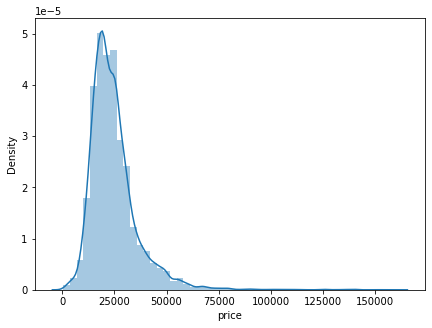

In [20]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["price"]) #Dağılımını yani nasıl dağıldığını göster demektir.

#distplot metodu daha sonraki versiyonlarda silineceği için displot ve histplot metodu kullanın hatasını verdi.

In [21]:
#Görüldüğü üzere veri normal dağılıma sahip ve veriler daha çok 25000'de toplandığı görülüyor.
#Fakat verimizde çok yüksek fiyatlı değerler de var. Bu veriler sıkıntı oluşturabilir.
#Çünkü modelimize yeni özellikler verdiğimizde doğru sonuçlar elde edilemeyebilir.

#Örneğin modelimize yeni özellikler verildiğinde o özelliklere göre fiyat 75000 olacakken
#benzer özelliklerde daha fazla fiyatlı arabalar verimizin içinde olduğundan modelimiz bize yanlış sonuçlar verebilir.
#Veya elimizde 10-20 civarında yüksek fiyatlı veriler var diye bazı özellikler verdiğimizde model yüksek fiyatlı sonuçlar
#elde edebilir. (sapma olabilir)

#Çıkartma işlemi yaptığımızda zaten biz yüksek özellikler verdiğimizde model otomatik olarak fiyatını yükseltecektir.
#O yüzden modelimizin doğru çalışması için aykırı değerlerin çıkartılması gerekir ki
#modelimiz fiyat ile özellikler arasındaki fonksiyonel ilişkiyi doğru kurabilsin.

#Aykırı değerleri çıkarmadığımız zamanki modeli eğittiğimizde modelin oluşturduğu fonksiyonel ilişki ile,
#aykırı değerleri çıkardığımız zamanki modeli eğittiğimizde modelin oluşturduğu fonksiyonel ilişki farklı olacağından
#daha sonrasında modele bazı özellikler verdiğimizde bize yanlış sonuçlar verebilir.

#Özet olarak:
#Hassas bir denklem elde edilmek isteniyorsa çıkarma işleminin yapılmasına gerek yoktur.
#Ya da her iki durum da denenmeli ve hangisi daha iyi çalışıyorsa o kullanılmalıdır.
#Aykırı değerlerin atılması ile model yine de iyi çalışıyorsa atılmasında fayda vardır.

#Bu işlem tercih meselesidir.

C:\Users\ertug\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

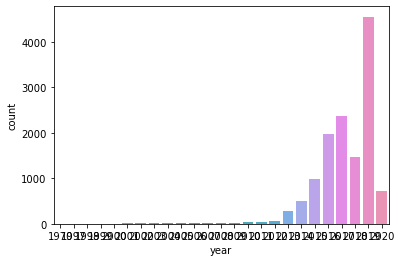

In [22]:
sbn.countplot(dataFrame["year"]) #Hangi yıldan kaç tane olduğunun bilgisini verir.

In [23]:
dataFrame.corr() #Değişkenlerin birbirleri arasındaki ilişkiyi gösterir. (korelasyon)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [24]:
dataFrame.corr()["price"].sort_values() #Fiyatın diğer değişkenlere göre ilişkisi (sort_values() ile de değerler sıralandı)

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [25]:
#Görüldüğü üzere yılın ve motor boyutunun fiyata pozitif yüksek bir ilişkisi vardır.
#Yani yıl ve motor boyutu arttığında fiyat artacaktır. (mantıken)

#En çok negatif ilişkiye sahip özellik ne kadar mil kullanıldığı bilgisidir.
#Kullanılan mil arttıkça fiyat da düşecektir. (mantıken)

In [26]:
#Fark edileceği üzere "transmission" özelliği hesaplanmadı. Çünkü nicel bir özellik olduğu için hesaplama yapamadı.
#Otomatik olanlara 1, manuel olanlara 0 atanarak hesaplama yapılabilir.
#Fakat fiyata çok etki etmediği düşünüldüğü için hesaplama yapılmayacak.

## 8.17_En Yüksek Fiyatlı Arabalar

<AxesSubplot:xlabel='mileage', ylabel='price'>

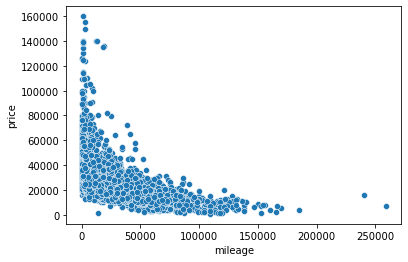

In [27]:
sbn.scatterplot(x = "mileage", y = "price", data = dataFrame)

In [28]:
dataFrame.sort_values("price", ascending = False).head(20)

#ascending, yazılan değerin artarak gösterip göstermeyeceğinin sorusunu sorar.
#False dediğimiz için artan değil de azalan bir tablo getirsin istedik. (fiyat olarak)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [29]:
dataFrame.sort_values("price", ascending = True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [30]:
#Düşük fiyatlıları değil de yüksek fiyatları veriden çıkarmamızın sebebi grafiğe bakarak bunu anlamamızdır.
#Yüksek fiyatlı arabalar daha az olduğu için onlar çıkarılmalıdır.
#Unutulmamalıdır ki çıkarma işlemi tamamen tercih meselesidir.
#Her ikisi de gösterilecektir, fakat bu adımda çıkarma işlemi yapılacaktır.

In [31]:
len(dataFrame)

13119

In [32]:
len(dataFrame) * 0.01

131.19

In [33]:
#Bir verinin %99'u alındığında yüksek ihtimalle o verinin yansıttığı genel tabloyu bozmadan işlemlere devam edilebilir.
#Hesaplandığına göre 131 tane yüksek fiyatlı veri çıkartıldığında verinin genel yapısı bozulmamış olur.

## 8.18_Veri Temizliği

In [34]:
yuzdeDoksanDokuzDf = dataFrame.sort_values("price", ascending = False).iloc[131:]

#131. satırdan sonrası alındı ve değişkene eşitlendi. Böylece en yüksek fiyatlı 131 veri gitmiş oldu.

In [35]:
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\ertug\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

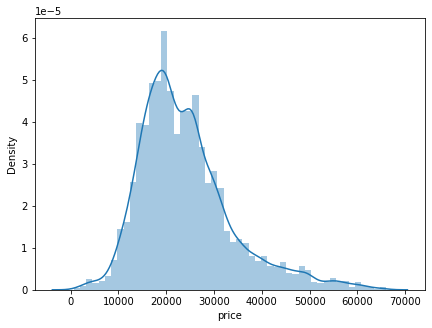

In [36]:
plt.figure(figsize = (7,5))
sbn.distplot(yuzdeDoksanDokuzDf["price"])

In [37]:
#Görüldüğü üzere yüksek fiyatlı veriler atıldığında daha düzgün bir normal dağılım elde edildi.

In [38]:
dataFrame.describe() #Orijinal dataFrame hala duruyor. Onda bir değişiklik yapılmadı.

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [39]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [40]:
yuzdeDoksanDokuzDf.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [41]:
#Verilere bakıldığında 1970 model arabaların ortalaması (25000) 2018 civarı yıllar ile neredeyse aynı.
#Bu veriler de çıkarılabilir fakat tercih meselesidir. Biz çıkarma işlemi yapacağız.

In [42]:
dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]

#Yılı 1970'e eşit olmayan veriler getirildi. Bu şekilde yazılarak ve bir değişkene aktarılarak 1970'li veriler atılabilir.
#"dataFrame.year != 1970" komutu SQL'de kullanılan bir komuttur, Python bu yazımı destekler.

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [43]:
dataFrame = yuzdeDoksanDokuzDf #Güncel veriler dataFrame'me eşitlendi.

In [44]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [45]:
dataFrame = dataFrame[dataFrame.year != 1970] #1970'li veriler atılıp dataFrame'e eşitlendi.

In [46]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [47]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [48]:
#"Transmission" sütunu sayısal bir veri olmadığı için o sütun atılmalıdır.
#Atılıp atılmaması yine tercih meselesidir, değer verilerek de işleme koyulabilir. (0,1 gibi)

In [49]:
dataFrame = dataFrame.drop("transmission", axis = 1)

### Normallik Testleri (Özel Kontrol)

#### Not: Derse ait değildir, bana ait olup kontrol amaçlıdır.

In [50]:
from scipy import stats

In [51]:
print (stats.shapiro(dataFrame['price']))

ShapiroResult(statistic=0.9320070743560791, pvalue=0.0)


C:\Users\ertug\anaconda3\envs\tf\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [52]:
np.log(dataFrame["price"])

6177     11.097258
5779     11.097258
3191     11.097107
4727     11.082143
8814     11.082127
           ...    
11549     7.309881
12594     7.309881
11765     7.306531
12008     7.207860
11816     6.476972
Name: price, Length: 12987, dtype: float64

C:\Users\ertug\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

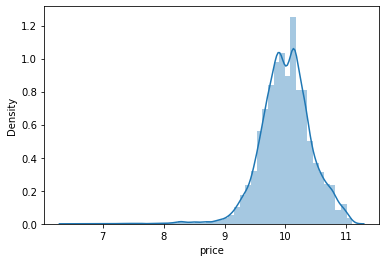

In [53]:
sbn.distplot(np.log(dataFrame["price"]))

In [54]:
from scipy.stats import kstest

In [55]:
statistic, pvalue = kstest(np.log(dataFrame['price']), 'norm')
print('statistic=%.3f, p=%.3f\n' % (statistic, pvalue))

if pvalue > 0.05:
    print("Normaldir.")
else:
    print("Normal Değildir.")

statistic=1.000, p=0.000

Normal Değildir.


In [56]:
#Veri temizliği gerçekleşti. Artık bu veri eğitilmek için hazır.

#### Not: Kontrol buraya kadardır.

## 8.19_Model Oluşturmak

In [57]:
#Adımları hatırlayalım:

In [58]:
#Adım 1:

#Tahmin edilmek istenen değişken(fiyat) Numpy dizisine dönüştürülüp y'ye atanır.
#Özellikler Numpy dizisine dönüştürülüp x'e atanır.

y = dataFrame["price"].values
x = dataFrame.drop("price", axis = 1).values
#Fiyat değişkeni atıldığında geriye kalan değişkenler "özellikler" oldu ve x'e atandı.
#Fazla özellik olduğunda bu komut işe yarayacaktır.

In [59]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [60]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [61]:
#Adım 2:

#Veriler train/test olarak ikiye ayrılır.

In [62]:
from sklearn.model_selection import train_test_split #Ayırma işlemi için gerekli kütüphane import edilir.

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

#Yüzde kaçının teste ayrılacağı belirlenir.
#Aynı bölünmüş veriler kullanılmak istendiğinde random_state sayısı karar verilir ve ona atanır. (tercih meselesidir)

In [64]:
len(x_train) #Ne kadar sayıda ayrıldığının kontrolü yapılabilir.

9090

In [65]:
len(x_test) #Ne kadar sayıda ayrıldığının kontrolü yapılabilir.

3897

In [66]:
#Adım: 3

#x'lere (özelliklere) scaling(ölçeklendirme) işlemi yapılır. (bu işlem için normalize işlemi yapılır -> 0-1 aralığına)

In [67]:
from sklearn.preprocessing import MinMaxScaler #Scaling işlemi için gerekli kütüphane import edilir.

In [68]:
scaler = MinMaxScaler()

In [69]:
x_train = scaler.fit_transform(x_train)

In [70]:
x_train

array([[0.82608696, 0.07228985, 0.03448276, 0.30619796, 0.33870968],
       [0.86956522, 0.22407036, 0.25      , 0.27890842, 0.32258065],
       [0.82608696, 0.11663365, 0.05172414, 0.29879741, 0.32258065],
       ...,
       [0.65217391, 0.25115541, 0.21551724, 0.27890842, 0.29032258],
       [0.73913043, 0.11981513, 0.34482759, 0.18408881, 0.32258065],
       [0.86956522, 0.06027436, 0.40517241, 0.20212766, 0.35483871]])

In [71]:
x_test = scaler.transform(x_test)

In [72]:
x_test

array([[0.82608696, 0.03091518, 0.03448276, 0.30619796, 0.33870968],
       [0.82608696, 0.02683408, 0.34482759, 0.19287697, 0.32258065],
       [1.        , 0.01605026, 0.25      , 0.29879741, 0.24193548],
       ...,
       [0.95652174, 0.03815459, 0.25      , 0.27890842, 0.32258065],
       [0.82608696, 0.32833718, 0.        , 0.56290472, 0.32258065],
       [0.95652174, 0.018502  , 0.25      , 0.26734505, 0.25806452]])

In [73]:
#Adım 4:

#Model ve katmanlar oluşturulur.

In [74]:
from tensorflow.keras.models import Sequential #Model oluşturmak için gerekli kütüphane import edilir.
from tensorflow.keras.layers import Dense #Katman oluşturmak için gerekli kütüphane import edilir.

#Dense: Nöronların, outputların birbirine bağlı olduğu katman çeşidi.
#Sequential: Model oluşturma sınıfı.

In [75]:
x_train.shape

(9090, 5)

In [76]:
#5 tane özellik olduğuna göre ilk katmanda da 5 tane nöron olması mantıklı olacaktır.
#Tahmin:
#Çünkü bir nöron bir özelliği alıp fiyata göre fonksiyonel ilişki(model) kurması gerekiyor. Bu da 5 nörona eşit olur.

#Tabi ki doğru sonuç vermediğinde nöron sayısı da arttırılabilir.
#Burada 12 nöron tercih edildi. (eğitmen daha öncesinde 5 nöron koyduğunda pek iyi sonuç alamadığı için 12 nöron denenecek)

In [77]:
model = Sequential()

model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [78]:
#Adım 5:

#Model eğitilmeye başlanır.

In [79]:
model.fit(x = x_train, y = y_train, validation_data=(x_test, y_test), batch_size = 250, epochs = 300)

#validation_data, doğrulama verisi anlamındadır.
#Testlerimizi de vererek ne kadar kayıp (hata) olduğunu da öğrenebiliriz.

#batch_size, modele kaçar kaçar öğrenme verisi gönderileceğini belirtir.
#9090 tane eğitim verisini bir anda modele vermek modeli yoracaktır. O yüzden azar azar verilmelidir.
#Burada 250'şer olarak veri verilmesi tercih edildi.
#Verinin çokluğuna göre bu değer karar verilir veya hiç yazılmaz. Çok düşük yazıldığında da çok uzun sürecektir.

Epoch 1/300
37/37 [==============================] - 1s 15ms/step - loss: 672144960.0000 - val_loss: 688101312.0000
Epoch 2/300
37/37 [==============================] - 0s 4ms/step - loss: 672122560.0000 - val_loss: 688066688.0000
Epoch 3/300
37/37 [==============================] - 0s 4ms/step - loss: 672062400.0000 - val_loss: 687963712.0000
Epoch 4/300
37/37 [==============================] - 0s 4ms/step - loss: 671885696.0000 - val_loss: 687673088.0000
Epoch 5/300
37/37 [==============================] - 0s 4ms/step - loss: 671431360.0000 - val_loss: 686970944.0000
Epoch 6/300
37/37 [==============================] - 0s 4ms/step - loss: 670389760.0000 - val_loss: 685414592.0000
Epoch 7/300
37/37 [==============================] - 0s 4ms/step - loss: 668121792.0000 - val_loss: 682113728.0000
Epoch 8/300
37/37 [==============================] - 0s 4ms/step - loss: 663556608.0000 - val_loss: 675757312.0000
Epoch 9/300
37/37 [==============================] - 0s 4ms/step - loss: 655128

37/37 [==============================] - 0s 3ms/step - loss: 30742642.0000 - val_loss: 31630244.0000
Epoch 144/300
37/37 [==============================] - 0s 4ms/step - loss: 30460898.0000 - val_loss: 31285002.0000
Epoch 145/300
37/37 [==============================] - 0s 4ms/step - loss: 30141492.0000 - val_loss: 30977508.0000
Epoch 146/300
37/37 [==============================] - 0s 3ms/step - loss: 29850280.0000 - val_loss: 30717012.0000
Epoch 147/300
37/37 [==============================] - 0s 4ms/step - loss: 29593516.0000 - val_loss: 30404702.0000
Epoch 148/300
37/37 [==============================] - 0s 4ms/step - loss: 29340486.0000 - val_loss: 30176448.0000
Epoch 149/300
37/37 [==============================] - 0s 4ms/step - loss: 29071978.0000 - val_loss: 29864818.0000
Epoch 150/300
37/37 [==============================] - 0s 3ms/step - loss: 28832820.0000 - val_loss: 29685534.0000
Epoch 151/300
37/37 [==============================] - 0s 4ms/step - loss: 28587130.0000 - val

37/37 [==============================] - 0s 4ms/step - loss: 19531304.0000 - val_loss: 21055326.0000
Epoch 286/300
37/37 [==============================] - 0s 4ms/step - loss: 19516342.0000 - val_loss: 21026926.0000
Epoch 287/300
37/37 [==============================] - 0s 4ms/step - loss: 19517170.0000 - val_loss: 21038126.0000
Epoch 288/300
37/37 [==============================] - 0s 4ms/step - loss: 19515378.0000 - val_loss: 20992804.0000
Epoch 289/300
37/37 [==============================] - 0s 4ms/step - loss: 19491024.0000 - val_loss: 20997706.0000
Epoch 290/300
37/37 [==============================] - 0s 4ms/step - loss: 19481876.0000 - val_loss: 20992194.0000
Epoch 291/300
37/37 [==============================] - 0s 4ms/step - loss: 19496434.0000 - val_loss: 20969930.0000
Epoch 292/300
37/37 [==============================] - 0s 4ms/step - loss: 19460538.0000 - val_loss: 20964150.0000
Epoch 293/300
37/37 [==============================] - 0s 4ms/step - loss: 19462428.0000 - val

## 8.20_Sonuçları Değerlendirmek

In [80]:
#Adım 6:

#loss'lar incelenir.

In [81]:
kayipVerisi = pd.DataFrame(model.history.history)

In [82]:
kayipVerisi.head()

,loss,val_loss
0,672144960.0,688101312.0
1,672122560.0,688066688.0
2,672062400.0,687963712.0
3,671885696.0,687673088.0
4,671431360.0,686970944.0


<AxesSubplot:>

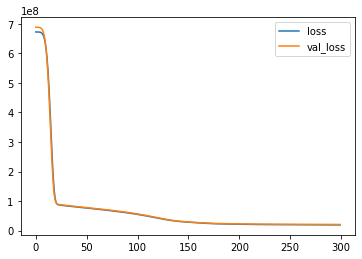

In [83]:
kayipVerisi.plot()

In [84]:
#İki çizginin de beraber ilerlemesi iyiye işarettir.

In [85]:
#Adım 7:

#Modele x_test'leri vererek y'ler tahmin edilir.

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [87]:
tahminDizisi = model.predict(x_test)

In [88]:
tahminDizisi

array([[22688.812],
       [23799.934],
       [24618.146],
       ...,
       [25972.576],
       [11262.649],
       [24525.684]], dtype=float32)

In [89]:
#Adım 8:

#Hatalar incelenir.

In [90]:
mean_absolute_error(y_test, tahminDizisi)

3237.9950084045113

In [91]:
#Gerçek fiyat ile tahmin fiyatı arasındaki ortalama hata (sapma) hesaplandı.
#Bu hatanın kabul edilebilir olup olmadığının kararını veri ile uğraşan kişi verir.

#Eğer model beğenilmezse veya daha iyi sonuçlar elde edilmek isteniyorsa şunlar değiştirilebilir:

# 1-Daha fazla veri temizlenebilir.
# 2-Train/test ayırma oranı değiştirilebilir.
# 3-Epoch sayısı arttırılabilir.
# 4-Nöron ve katman sayıları arttırılabilir.

#Özellikle epoch sayısı, nöron sayısı ve katman sayısı abartılmadan arttırılmalıdır. Aksi halde overfittinge yol açabilir.

In [92]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


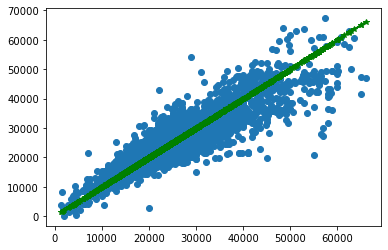

In [93]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test, y_test, "g-*")

#Yeşil olan grafik gerçek değerler iken mavi noktalar tahmin değerleridir.
#Bura grafikte tahmin değerlerinin(mavi noktalar) gerçek değerlerden(yeşil çizgi) ne kadar sapıldığını göstermektedir.

#Fakat normalde regresyonda yeşil çizginin model(tahminler), mavi noktaların gerçek değerler olması gerekir.
#Yani normalde regresyonda tam tersidir. Bu KARIŞTIRILMAMALIDIR!!! Fakat sonuç olarak pek fark yoktur.

In [94]:
#Adım 9:

#Modelin iyi çalıştığına kanaat getirildiğinde farklı özellikler verilip model test edilebilir.

#Fakat burada kendi verimizden bir satır test edilecektir.

In [95]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [96]:
#Bu satırdaki fiyat tahmin edilmeye çalışılsın.

In [97]:
yeniArabaSeries = dataFrame.drop("price", axis = 1).iloc[2]
#2.satırdaki fiyat çıkartılıp onun özellikleri değişkene atandı.

In [98]:
yeniArabaSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [99]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

#Değişkenimizin boyutları da girilmelidir. Çünkü değişkenimiz 2 boyutludur. (satır-özellik olduğu için)
#Eğer yalnız "yeniArabaSeries = scaler.transform(yeniArabaSeries.values)" yazılırsa hata verecektir.
#O yüzden boyutları girilerek işlem yapılmalıdır.

#yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(1,5)) --> bu da aynı işlemi yapmaktadır.

In [100]:
yeniArabaSeries

array([[1.        , 0.01543635, 0.25      , 0.12442183, 0.64516129]])

In [101]:
model.predict(yeniArabaSeries)

array([[61515.645]], dtype=float32)

In [102]:
#Görüldüğü üzere modele bu özellikler verildiğinde ortalama olarak bu fiyat olabilir sonucunu verdi.

In [103]:
#Modeli eğitme aşamaları bu şekildedir. Genel olarak bu adımlar yapıldığında model eğitilmiş olur.